# Programming Challenge 1

This [Python](https://www.python.org) challenge will use the `numpy.random` module to generate pseudo random numbers.
Remember to import this module whenever needed.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Write a method to simulate the selection of an element from a collection of consecutive integers.
It should return random integers from zero to `num_outcomes` (exclusive).

In [2]:
def integersequence(num_outcomes=2,vec_length=1):
    # Return random integers from 0 to high (exclusive)
    #
    outcome = []
    for index in range(vec_length):
        a = np.random.randint(num_outcomes)
        outcome.append(a) # EDIT
    return outcome

integersequence(2,10)

[1, 0, 1, 0, 0, 1, 1, 1, 1, 0]

Create a numerical simulation that call this method in a loop 10,000 times.
Using a loop, compute the empirical distribution for the number of ones contained in `integersequence(5,10)`.

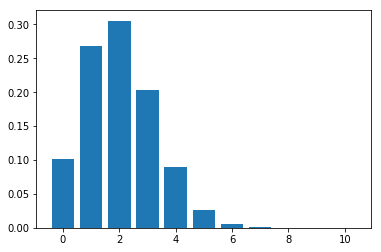

In [3]:
trial_num = 10000
num_outcomes = 5
vec_length = 10
empirical_dist = np.zeros(vec_length+1)

for trial in range(0, trial_num):
    # Computes empirical distribution of ones
    #
    outcome = integersequence(num_outcomes,vec_length) # EDIT
    count_ones = outcome.count(1)
    empirical_dist[count_ones] += 1
empirical_dist = empirical_dist/trial_num

plt.bar(range(0,11),empirical_dist)
plt.show()

Turn the example above into a method and create a `csv` file that contains the empirical distribution over 10,000 trials for `integersequence(arg,10)` where `arg` ranges from two to 20.

In [4]:
def distribution_sim(num_outcomes_ds=2,vec_length_ds=10):
    # Returns emmpirical distribution
    trial_num_ds = 10000
    empirical_dist_ds = np.zeros(vec_length_ds+1)

    for trial in range(0, trial_num_ds):
        outcome_ds = integersequence(num_outcomes_ds,vec_length_ds) # EDIT
        count_ones_ds = outcome_ds.count(1)
        empirical_dist_ds[count_ones_ds] += 1

    empirical_dist_ds = empirical_dist_ds/trial_num_ds
    return empirical_dist_ds

# Create an empty horizontal vector
distributions = np.empty((0, vec_length+1))
print(distributions.shape)

for num_outcomes in range(2,21):
    empirical_dist = distribution_sim(num_outcomes,10)
    # Add rows to horizontal vector
    distributions = np.append(distributions, [empirical_dist], axis=0)
    print(distributions.shape)

# Write output file
pd.DataFrame(distributions).to_csv("1challenge.csv")

(0, 11)
(1, 11)
(2, 11)
(3, 11)
(4, 11)
(5, 11)
(6, 11)
(7, 11)
(8, 11)
(9, 11)
(10, 11)
(11, 11)
(12, 11)
(13, 11)
(14, 11)
(15, 11)
(16, 11)
(17, 11)
(18, 11)
(19, 11)


Can you write a program to see how long, on average, it will take you to see a one as a function of the number of possible outcomes 'num_outcomes'?

In [5]:
# Average of the index of the first one observed in a randomly generated sequence 
# with elements from the set of integers between 0 (inclusive) and arg (exclusive) where arg ranges from 2 to 20.

def ave_first_one_sim(num_outcomes_ds=2,vec_length_ds=10):
    trial_num_ds = 10000
    count_ds = 0
    trial = 0
    
    while trial<trial_num_ds:
        outcome_ds = integersequence(num_outcomes_ds,vec_length_ds)
        if 1 in outcome_ds:
            first_one_index = outcome_ds.index(1)
            count_ds += first_one_index
            trial += 1

    ave_first_one = count_ds/trial_num_ds
    return ave_first_one

ave_first_one_vec = []
for num_outcomes in range(2,21):
    ave_first_one = ave_first_one_sim(num_outcomes,10)
    ave_first_one_vec = np.append(ave_first_one_vec, ave_first_one)
    
print(ave_first_one_vec)

[0.9893 1.8607 2.3806 2.8306 3.0647 3.2768 3.4068 3.564  3.5849 3.7389
 3.8378 3.838  3.9272 3.9366 3.9081 4.0403 4.0233 4.0283 4.0883]
